### multiple linear regression

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

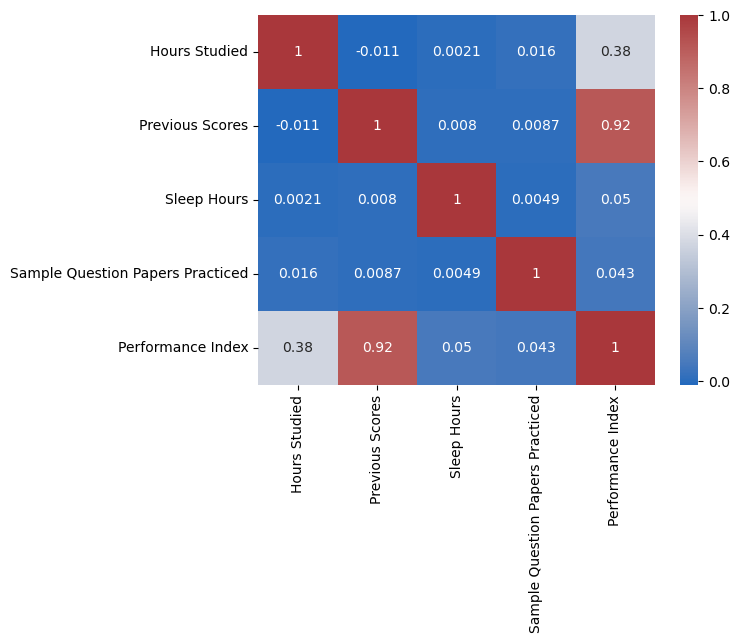

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]
[91. 65. 45. ... 74. 95. 64.]
[[7 99 1 9 1]
 [4 82 0 4 2]
 [8 51 1 7 2]
 ...
 [6 83 1 8 5]
 [9 97 1 7 0]
 [7 74 0 8 1]]
(7898,)
(1975,)
Train score :0.9888967225498639 
 Test score 0.9878120360079914
[73.05054486 27.90456729 39.52609214 ... 42.51831731 34.5411674
 70.50845371]
MSE : 4.490041091497725 
 Mean absolute error : 1.6911921606195817 
 r2_score :0.9878120360079914
      actual  predicted
0       74.0  73.050545
1       30.0  27.904567
2       40.0  39.526092
3       68.0  67.077412
4       63.0  61.572131
...      ...        ...
1970    19.0  19.038347
1971    53.0  56.357122
1972    43.0  42.518317
1973    33.0  34.541167
1974    67.0  70.508454

[1975 rows x 2 columns]
Correlation Coefficient: 0.9938932425502098


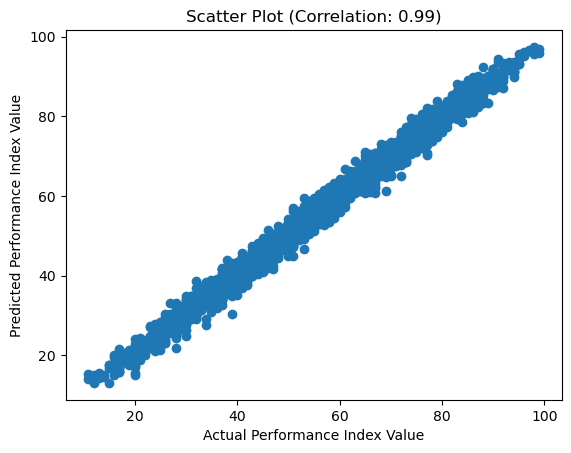

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Student_Performance.csv')

print (data.head())
print (data.info())
print (data.isnull().sum())
print (data.shape)
print (data.duplicated().sum())

data.drop_duplicates(inplace=True)

print(data.describe().T)

# Check correlation using a heatmap
sns.heatmap(data=data.select_dtypes(exclude="object").corr(), annot=True, cmap="vlag")
plt.show()

# Prepare for training, testing split - All features in x, the predicted value in y
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# x will now contain Hours studied, Previous scores, Extracurricluar activities, Sleep Hours, and Sample Question Papers Practiced (Features)
# y will contain the outcome (Performance Index)

print(x)
print(y)

# Do one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label = LabelEncoder()
x[:,2]= label.fit_transform(x[:,2])
print(x)

# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(y_train.shape)
print(y_test.shape)

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# Print results
pred = model.predict(x_test)
print('Train score :{} \n Test score {}'.format(model.score(x_train,y_train),model.score(x_test,y_test)))

print(pred)

# Check accuracy
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print('MSE : {} \n Mean absolute error : {} \n r2_score :{}'.format( mean_squared_error(y_test,pred), mean_absolute_error(y_test,pred), r2_score(y_test,pred)))

# Create a new DF containing actual Performance Index value and predicted Performance Index value for the test set

df_compare = pd.DataFrame()
df_compare['actual'] = y_test
df_compare['predicted'] = pred

print(df_compare)

# Create regression plot of the actual versus predicted
correlation_coefficient = df_compare['actual'].corr(df_compare['predicted'])

print(f'Correlation Coefficient: {correlation_coefficient}')

# Plot a scatter plot to visualize the data
plt.scatter(df_compare['actual'], df_compare['predicted'])
plt.xlabel('Actual Performance Index Value')
plt.ylabel('Predicted Performance Index Value')
plt.title(f'Scatter Plot (Correlation: {correlation_coefficient:.2f})')
plt.show()

# decision tree's

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split 

# Read the data
data = pd.read_csv("titanic-tested.csv")

# Drop rows with missing values
#data = data.dropna()

# Define features and target variable
features = ["Pclass", "Gender", "Age", "SibSp", "Embarked"]
target = "Survived"

# Encode categorical features
encoder = LabelEncoder()
for col in features:
  if data[col].dtype == object:
    data[col] = encoder.fit_transform(data[col])

# Scale numeric feature (Age)
scaler = StandardScaler()
data["Age"] = scaler.fit_transform(data[["Age"]])

# Separate features and target
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 70% training and 30% test

# Create decision tree classifier
model = DecisionTreeClassifier()

# Train the model
model = model.fit(X_train,y_train)

y_pred = model.predict(X_test)

from sklearn import metrics 
from sklearn.metrics import confusion_matrix

# Print various classification metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

# Print the importance of each feature
print("Feature importances:")
for feature, importance in zip(features, model.feature_importances_):
  print(f"{feature}: {importance:.2f}")

# Make predictions (commented out for now)
# Assuming you have a separate test dataset with similar structure as 'data'
# test_data = pd.read_csv("titanic_test.csv")  # Replace with your test data path
# predictions = model.predict(test_data[features])

# Save the tree as an image
# Three options

# Option 1 - Create a dot file and then convert manually to png format
# Save the tree as a DOT file
# pip install export_graphviz
#with open("titanic_tree.dot", "w") as f:
#  export_graphviz(model, out_file=f, feature_names=features, filled=True)
# You will then have to say dot -Tpng titanic_tree.dot -o titanic_tree.png to convert

# OR ... Search for "dot file editor" in google and open one -> 
#    Paste the .dot file contents in that editor

# Option 2 - Directly create a png file
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

# Option 3: Also try to print it within the code itself
# pip install graphviz
import graphviz
dot_data = export_graphviz(model, out_file=None, feature_names = features, 
           class_names=['0','1'], rounded = True, filled = True)

graph = graphviz.Source(dot_data)
graph.render ("decision-tree") # Will create a PDF file and open it
graph.view() # For Jupyter etc


Confusion Matrix:
 [[58  0]
 [ 0 26]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Feature importances:
Pclass: 0.00
Gender: 1.00
Age: 0.00
SibSp: 0.00
Embarked: 0.00


InvocationException: GraphViz's executables not found

# monte carlo

In [92]:
import numpy as np
def roll_dice():
    # simulation of rolling a dice twice, minimum number we get is q, max is 6
    # add the result of the two simulations, so possible values will be:
    # (1,1) or(1,2)------------(6,6) sum will vary form [2,12]
    # run multiple times to verify
    return np.sum(np.random.randint(1, 7, 2))

print(roll_dice())

7


In [155]:
# part2
# someone approaches us saying i will give you 5 dollars if you get 7 and take 1 
# #         dollar if you get a number other than 7
# how do we know what will happen?
# our own monte carlo function

def monte_carlo_simulation(runs = 1000):
    results = np.zeros(2)  # an array, results[0] and results[1] initialized to two zeroes
    for i in range(runs):
        if roll_dice() == 7:
            results[0] += 1
        else:
            results[1] += 1
    return results

# test 2-3 times and calculate how much you will win versus you lose
print(monte_carlo_simulation())
print(monte_carlo_simulation())
print(monte_carlo_simulation())

[201. 799.]
[169. 831.]
[164. 836.]


In [159]:
# part 3: now do it for 1000 times
results = np.zeros(1000)

for i in range(1000):
    results[i] = monte_carlo_simulation()[0]
print(results)

[163. 190. 155. 152. 182. 150. 146. 174. 195. 171. 153. 154. 171. 168.
 166. 167. 172. 195. 181. 155. 166. 154. 177. 149. 185. 148. 176. 155.
 154. 164. 164. 147. 163. 162. 175. 177. 167. 180. 188. 187. 163. 166.
 153. 170. 179. 143. 159. 171. 153. 162. 182. 179. 181. 175. 172. 166.
 155. 161. 155. 169. 163. 173. 174. 165. 166. 159. 178. 176. 160. 154.
 190. 181. 166. 160. 148. 161. 170. 146. 172. 186. 157. 169. 152. 147.
 163. 162. 187. 157. 165. 164. 154. 184. 165. 184. 163. 149. 162. 163.
 157. 155. 162. 154. 156. 175. 177. 155. 164. 181. 146. 187. 145. 177.
 148. 178. 175. 169. 183. 177. 165. 166. 181. 160. 172. 190. 142. 197.
 166. 166. 150. 162. 174. 169. 167. 148. 168. 166. 183. 176. 174. 181.
 150. 155. 167. 142. 163. 154. 162. 175. 167. 160. 176. 172. 135. 160.
 171. 142. 185. 172. 157. 157. 195. 153. 182. 150. 173. 165. 152. 165.
 164. 152. 171. 170. 164. 194. 172. 164. 162. 158. 158. 157. 167. 160.
 158. 158. 161. 162. 173. 167. 162. 168. 175. 185. 170. 158. 171. 177.
 174. 

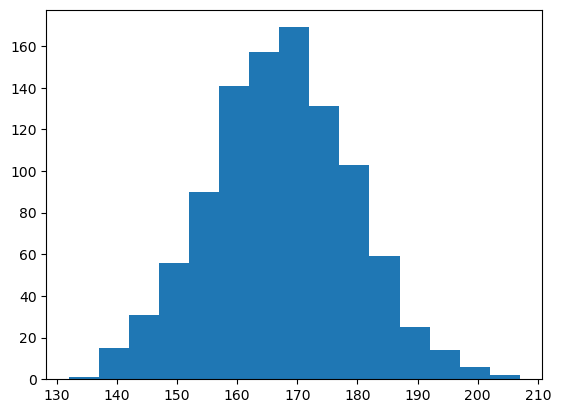

In [161]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(result, bins = 15)
plt.show()

In [163]:
print(results.mean()) # general mean
print(results.mean()*5) # what we will get as win on an average
print(results.mean()*4.75) # just a marginal change in win reward - see the impact
print(1000 - results.mean()) # what we will play on average
print(results.mean()/1000) # probability of the we will win result

166.693
833.465
791.7917500000001
833.307
0.166693


In [30]:
data = pd.read_csv("titanic-tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
features = ["Pclass", "Gender", "Age", "SibSp", "Embarked"]
target = "Survived"
encoder = LabelEncoder()
for col in features:
    if data[col].dtype == object:
        data[col] = encoder.fit_transform(data[col])

scaler = StandardScaler()
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Gender       418 non-null    int32  
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 36.1+ KB
None


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2
